In [1]:
# Imports
import pandas as pd
import numpy as np
import pandas_datareader.data as web

In [2]:
# reindex - to created a new object with dtat conformed to a new index
# reindex - Series
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index = ['d', 'b', 'a', 'c'])
print(obj, '\n')

# rearranges data, by label, and add new entry initialized to NaN
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print(obj2, '\n')

# Use 'method' argument to "fill-in" missing data using supplied function
obj3 = pd.Series(['blue', 'purple', 'yellow'], index = [0, 2, 4])
print(obj3, '\n')
# use method = 'ffill' to duplicate data
print(obj3.reindex(range(6), method = 'ffill'), '\n')

# reindex - DataFrame
frame = pd.DataFrame(np.arange(9).reshape((3,3)), index = ['a', 'c', 'd'],
                     columns = ['Ohio', 'Texas', 'California'])
print(frame, '\n')
# reindex rows with data in new rows initialized to NaN
frame2 = frame.reindex(['a', 'b', 'c', 'd']) 
print(frame2, '\n')

# reindex columns by using 'columns' argument
states = ['Texas', 'Utah', 'California']
# reindex DataFrame removing a column and adding a new column with NaN data
print(frame.reindex(columns = states), '\n')
# include rows containing 'NaN' by indexing using row labels
print(frame.reindex(['a', 'b', 'c', 'd'], columns = states))

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64 

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64 

0      blue
2    purple
4    yellow
dtype: object 

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object 

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8 

   Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0 

   Texas  Utah  California
a      1   NaN           2
c      4   NaN           5
d      7   NaN           8 

   Texas  Utah  California
a    1.0   NaN         2.0
b    NaN   NaN         NaN
c    4.0   NaN         5.0
d    7.0   NaN         8.0


<center>reindex function arguments</center>

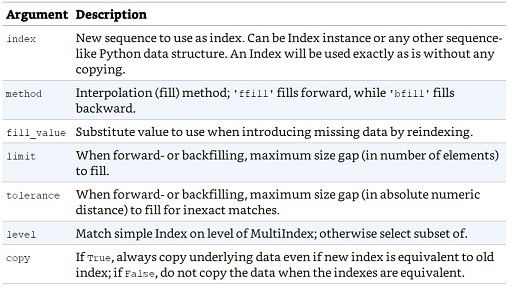

In [3]:
# .drop() - remove data from an Axis
obj = pd.Series(np.arange(5.), index = ['a', 'b', 'c', 'd', 'e'])
print(obj, '\n')
new_obj = obj.drop('c') # create a new pandas Series without row 'c'
print(new_obj, '\n')
print(obj.drop(['d', 'c']), '\n') # drop two rows

# In a DataFrame, you can drop row or column data
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                    index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns = ['one', 'two', 'three', 'four'])
print(data, '\n')
# drop rows 'Colorado' and 'Ohio' Note: rows are axis = 0
print(data.drop(['Colorado', 'Ohio']), '\n')
# drop columns using either axis = 1 or axis = columns & the proper index
print(data.drop('two', axis = 1), '\n')
print(data.drop(['two', 'four'], axis = 'columns'), '\n')

# Modify an object without creating a copy using the 'inplace' argument
obj.drop('c', inplace = True)
print(obj)

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64 

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64 

a    0.0
b    1.0
e    4.0
dtype: float64 

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15 

          one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15 

          one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15 

          one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14 

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64


In [4]:
# Indexing, Selection and Filtering
# Examples of slicing using Series's index values
obj = pd.Series(np.arange(4.), index = ['a', 'b', 'c', 'd'])
print(obj, '\n')
print(obj['b'])
print(obj[1], '\n')
print(obj[2:4], '\n')
print(obj[['b', 'a', 'd']], '\n')
print(obj[[1, 3]], '\n')
print(obj[obj < 2], '\n')

print("obj['b':'c']") # Slicing using labels includes endpoint
print(obj['b':'c'], '\n')

obj['b':'c'] = 5      # assigning values using it's index in-place
print(obj)

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64 

1.0
1.0 

c    2.0
d    3.0
dtype: float64 

b    1.0
a    0.0
d    3.0
dtype: float64 

b    1.0
d    3.0
dtype: float64 

a    0.0
b    1.0
dtype: float64 

obj['b':'c']
b    1.0
c    2.0
dtype: float64 

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64


In [5]:
# DataFrame
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                    index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns = ['one', 'two', 'three', 'four'])
print(data, '\n')
print(data['two'], '\n')          # retrieve a column using a single value
print(data[['three', 'one']], '\n') # get multiple columns using a sequence

print('Special Cases')               # Special cases of indexing
print(data[:2], '\n')                # Slicing
print(data[data['three'] > 5], '\n') # Selecting with a Boolean Array
# Selecting using a Boolean DataFrame
print(data < 5, '\n')                # create a Boolean DataFrame
data[data < 5] = 0            # Update DataFrame using a Boolean DataFrame
print(data, '\n')

# Using loc and iloc. Index using axis lables (loc) or integers (iloc)
print("loc & iloc", '\n')
print(data.loc['Colorado', ['two', 'three']], '\n') # index using axis
print(data.loc[['Colorado', 'Utah'], ['two', 'three']], '\n') 
print(data.iloc[2], '\n')                           # index using integers
print(data.iloc[[1, 2], [3, 0, 1]], '\n')           # [[rows], [columns]]
print(data.loc[:'Utah', 'two'], '\n')              # can index using slices
print(data.iloc[:, :3][data.three > 5])

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15 

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32 

          three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12 

Special Cases
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7 

          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15 

            one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False 

          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15 

loc & iloc 

two      5
three    6
Name: Colorado, dty

<center>Options to rearange DataFrame objects</center>

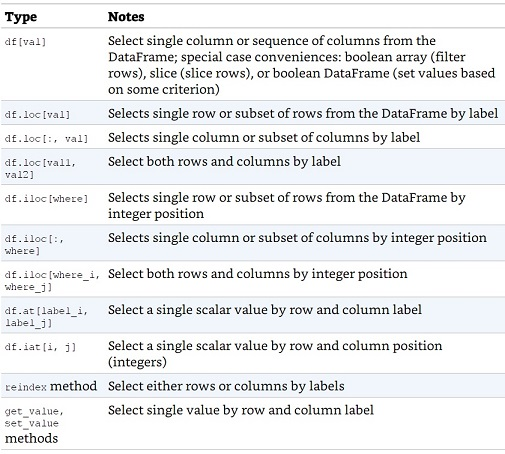

In [6]:
# Tips when working with integer indexes
ser = pd.Series(np.arange(3.))
print(ser, '\n')
# Code generates an error since it is unclear if we want label or integer 
# based indexing. Note:There is a label '1' in the series by no '-1' label 
try:
    print(ser[-1], '\n')
except KeyError:
    print("position based integer indexing generates an error", '\n')
    
# You can avoid the error by specifing integer based indexing use iloc
# This code doesn't generate an error
try:
    print(ser.iloc[-1], '\n')
except KeyError:
    print("position based integer indexing generates an error", '\n')

# String based labels solves the ambiguity allowing integer based indexing
ser2 = pd.Series(np.arange(3.), index = ['a', 'b', 'c'])
print(ser2, '\n')
# This code doesn't generate an error
try:
    print(ser2[-1], '\n')
except KeyError:
    print("position based integer indexing generates an error", '\n')

# Slicing is defined to always use integers so chance of error
print(ser[:-1])

0    0.0
1    1.0
2    2.0
dtype: float64 

position based integer indexing generates an error 

2.0 

a    0.0
b    1.0
c    2.0
dtype: float64 

2.0 

0    0.0
1    1.0
dtype: float64


In [7]:
# Data Alignment problem with arithmetic operations
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
print(s1, '\n')
print(s2, '\n')

# Adding series together creates missing values where data is not aligned
# s1+s2('a') = 7.3 + -2.1 = 5.2 but, s1+s2('d') = 3.4 + ? = 'NaN'  
print(s1 + s2, '\n')  

# DataFrames align on both rows and columns
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns = list('bcd'),
                   index = ['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns = list('bde'),
                   index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df1, '\n')
print(df2, '\n')

# adding DataFrames together produce NaNs on both axis
print(df1 + df2, '\n')

# if two DataFrames have nothing in common, result will contain all 'NaN's
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
print(df1, '\n')
print(df2, '\n')
print(df1 + df2) # creates DataFrame object with 'NaN' data

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64 

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64 

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64 

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0 

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0 

            b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN 

   A
0  1
1  2 

   B
0  3
1  4 

    A   B
0 NaN NaN
1 NaN NaN


In [8]:
# Fill in missing values when combining DataFrame objects
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns = list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns = list('abcde'))

df2.loc[1, 'b'] = np.nan  # make row 1, column 'b' = 'NaN'
print(df1, '\n')
print(df2, '\n')
print(df1 + df2, '\n') # Note the location of the 'NaN's

# use 'add()' method and 'fill_value' argment to initialze missing data
# Note: row 1, column 'b' = 5.0 + 0 = 5.0 instead of 5.0 + NaN = NaN
print(df1.add(df2, fill_value = 0), '\n')

# Note: each arithmetic operation has an operator counterpart
print(1 / df1, '\n')     # is same as
print(df1.rdiv(1), '\n') # Note: 'r' appened to front of 'div' nethod name

# 'reindex()' can also intialize missing data use 'fill_value' argument
print(df1.reindex(columns = df2.columns, fill_value = 0))

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0 

      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   NaN   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0 

      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0   NaN  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN 

      a     b     c     d     e
0   0.0   2.0   4.0   6.0   4.0
1   9.0   5.0  13.0  15.0   9.0
2  18.0  20.0  22.0  24.0  14.0
3  15.0  16.0  17.0  18.0  19.0 

       a         b         c         d
0    inf  1.000000  0.500000  0.333333
1  0.250  0.200000  0.166667  0.142857
2  0.125  0.111111  0.100000  0.090909 

       a         b         c         d
0    inf  1.000000  0.500000  0.333333
1  0.250  0.200000  0.166667  0.142857
2  0.125  0.111111  0.100000  0.090909 

     a    b     c     d  e
0  0.0  1.0   2.0   3.0  0
1  4.0  5.0   6.0   7.0  0
2  8.0  9.0  10.0  11.0  0


<center>Arithmetic methods and operators</center>

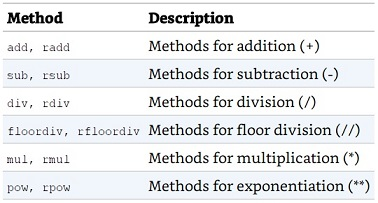

In [9]:
# Performing operations on DataFrames using Series
arr = np.arange(12.).reshape((3, 4))
print(arr, '\n')
print(arr[0], '\n')  # print first row of the DataFrame
print(arr - arr[0], '\n') # subtract row arr[0] from every row in DataFrame
                          # Note: this is called 'broadcasting'

frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), 
                               index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0] # create a series from the first row of frame
print(frame, '\n')
print(series, '\n')  # print first row of the DataFrame
print(frame - series, '\n') # subtracts series from each row ot DataFrame

series2 = pd.Series(range(3), index = ['b', 'e', 'f'])
print(series2, '\n')
# maps series's index to DataFrame's columns. On columns with no match,
# DataFrame is reindexed with data in the columns set to 'NaN'
print(frame + series2, '\n') 

# to broadcast over columns using a series, use an arethmetic method
print('Column Broadcast', '\n')
series3 = frame['d']
print(frame,'\n')
print(series3, '\n')

# subtract series.T (transposed) from each DataFrame columns
# match on rows (axis = 'index') or axis = 0) and broadcast across columns
print(frame.sub(series3, axis = 'index'))

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]] 

[0. 1. 2. 3.] 

[[0. 0. 0. 0.]
 [4. 4. 4. 4.]
 [8. 8. 8. 8.]] 

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0 

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64 

          b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0 

b    0
e    1
f    2
dtype: int64 

          b   d     e   f
Utah    0.0 NaN   3.0 NaN
Ohio    3.0 NaN   6.0 NaN
Texas   6.0 NaN   9.0 NaN
Oregon  9.0 NaN  12.0 NaN 

Column Broadcast 

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0 

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64 

          b    d    e
Utah   -1.0  0.0  1.0
Ohio   -1.0  0.0  1.0
Texas  -1.0  0.0  1.0
Oregon -1.0  0.0  1.0


In [10]:
# Mapping and applying functions 
# NumPy ufuncs()
frame = pd.DataFrame(np.random.randn(4, 3), columns = list('bde'), 
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
print(frame, '\n')
print(np.abs(frame), '\n') # apply absolute value NumPy ufunc()

# Lambda functions
f = lambda x: x.max() - x.min()
# use apply() method to perform lambda function on each column of frame
print(frame.apply(f), '\n') # column labels of frame are new series index
# apply lambda function to rows instead of columns using 'axis'argument
print (frame.apply(f, axis = 'columns'), '\n')

# Functions using apply() method can return Series objects
def f(x):
    return pd.Series([x.min(), x.max()], index = ['min', 'max'])
print(frame.apply(f), '\n')

format = lambda x: "%.2f" % x       # create element-wise function
# apply lambda function to each element in calumn 'e' using map()
print(frame['e'].map(format), '\n') 
# apply to lambda function to every element in 'frame' using applymap()
print(frame.applymap(format)) 

               b         d         e
Utah   -0.616134  0.064129  0.747721
Ohio   -1.145398  0.207677 -0.166828
Texas  -0.114604  0.451405 -0.971124
Oregon  0.877967 -0.592009 -0.505094 

               b         d         e
Utah    0.616134  0.064129  0.747721
Ohio    1.145398  0.207677  0.166828
Texas   0.114604  0.451405  0.971124
Oregon  0.877967  0.592009  0.505094 

b    2.023365
d    1.043414
e    1.718845
dtype: float64 

Utah      1.363855
Ohio      1.353075
Texas     1.422530
Oregon    1.469975
dtype: float64 

            b         d         e
min -1.145398 -0.592009 -0.971124
max  0.877967  0.451405  0.747721 

Utah       0.75
Ohio      -0.17
Texas     -0.97
Oregon    -0.51
Name: e, dtype: object 

            b      d      e
Utah    -0.62   0.06   0.75
Ohio    -1.15   0.21  -0.17
Texas   -0.11   0.45  -0.97
Oregon   0.88  -0.59  -0.51


In [11]:
# sorting
obj = pd.Series(range(4), index = ['d', 'a', 'b', 'c'])
print(obj.sort_index(), '\n') # sort by index

frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
print(frame, '\n')
# sort frame using index
print(frame.sort_index(), '\n')           # sort by row: default (axis = 0)
print(frame.sort_index(axis = 1), '\n')   # sort by column: (axis = 1)
print(frame.sort_index(axis=1, ascending=False)) # reverse sort by columns

# sort using values using sort_values() method
print('\n', 'Using sort_values() \n')
obj = pd.Series([4, 7, -3, 2])
print(obj.sort_values(), '\n')
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
print(obj.sort_values(), '\n') # missing values are placed at the end

# To specify columns for sorting, use 'by' argument of 'sort_values' method
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
print(frame, '\n')
print(frame.sort_values(by = 'b'), '\n') # Sort 'frame' using column 'b'
# Sort frame using column 'a' first and then 'b'
print(frame.sort_values(by=['a', 'b'])) 

a    1
b    2
c    3
d    0
dtype: int64 

       d  a  b  c
three  0  1  2  3
one    4  5  6  7 

       d  a  b  c
one    4  5  6  7
three  0  1  2  3 

       a  b  c  d
three  1  2  3  0
one    5  6  7  4 

       d  c  b  a
three  0  3  2  1
one    4  7  6  5

 Using sort_values() 

2   -3
3    2
0    4
1    7
dtype: int64 

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64 

   b  a
0  4  0
1  7  1
2 -3  0
3  2  1 

   b  a
2 -3  0
3  2  1
0  4  0
1  7  1 

   b  a
2 -3  0
0  4  0
3  2  1
1  7  1


In [12]:
# Ranking using rank() method
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
print(obj.rank(), '\n') # ties are broken using the mean rank
print(obj.rank(method='first')) # ties broken rank by order of first seen
print()
print(obj.rank(ascending=False, method='max')) # ties get max rank of group
print()

frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 
                      'c': [-2, 5, 8, 2.5]})
print(frame, '\n')
print(frame.rank(axis = 'columns')) # apply rank using columns

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64 

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

     b  a    c
0  4.3  0 -2.0
1  7.0  1  5.0
2 -3.0  0  8.0
3  2.0  1  2.5 

     b    a    c
0  3.0  2.0  1.0
1  3.0  1.0  2.0
2  1.0  2.0  3.0
3  2.0  1.0  3.0


<center>Methods to break ties using rank</center>

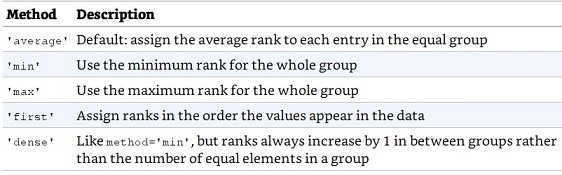

In [13]:
# Handling duplicate Labels
obj = pd.Series(range(5), index = ['a', 'a', 'b', 'b', 'c'])
print(obj, '\n')

# check if duplicate labels using 'is_unique' property
print(obj.index.is_unique, '\n')

print(obj['a'], '\n') # creates a new series since label 'a' is a duplicate
print(obj['c']) # returns the value (a scalar) since 'c' is unique

df = pd.DataFrame(np.random.randn(5, 3), index = ['a', 'a', 'b', 'b', 'c'])
print(df, '\n')
print(df.loc['b'], '\n') # a DataFrame containing duplicate rows is created
print((df.loc['c']))     # a Series is created when there is no duplicate

a    0
a    1
b    2
b    3
c    4
dtype: int64 

False 

a    0
a    1
dtype: int64 

4
          0         1         2
a  2.949560  0.031760 -0.892322
a  0.754404  0.173221 -1.404904
b -0.629566  1.031473  0.737211
b -0.334171 -0.129723 -0.748597
c -0.675889 -1.730637  0.345000 

          0         1         2
b -0.629566  1.031473  0.737211
b -0.334171 -0.129723 -0.748597 

0   -0.675889
1   -1.730637
2    0.345000
Name: c, dtype: float64


In [14]:
# Statistics
# sum() and mean()
df = pd.DataFrame ([[1.4, np.nan], [7.1, -4.5], 
                    [np.nan, np.nan], [0.75, -1.3]],
                   index = ['a', 'b', 'c', 'd'], columns = ['one', 'two'])
print(df, '\n')
print(df.sum(), '\n')    # compute the sum of the values in a DataFrame
print(df.sum(axis = 'columns'), '\n') # compute sum on columns (axis = 1)
# Show mean of data on columns including Nan columns by using 'skipna='
print(df.mean(axis = 'columns', skipna = False))

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3 

one    9.25
two   -5.80
dtype: float64 

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64 

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64


<center>Common reduction arguments</center>

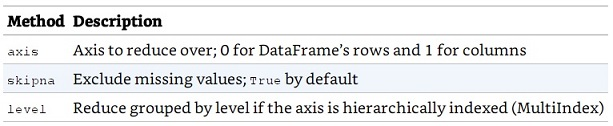

In [15]:
# Indirect Statistics 
print(df, '\n')
print(df.idxmax(), '\n')   # idxmax() - rows with max value in column
print(df.idxmin(), '\n')   # idxmin() - rows with min value in column
print(df.cumsum(), '\n')   # accumulations - cummulative sum of values
print(df.describe(), '\n') # Show multiple statistics
# Note: describe() shows different statistics for non-numeric data
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
print(obj.describe())

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3 

one    b
two    d
dtype: object 

one    d
two    b
dtype: object 

    one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8 

            one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000 

count     16
unique     3
top        a
freq       8
dtype: object


<center>Common Statistics Methods</center>

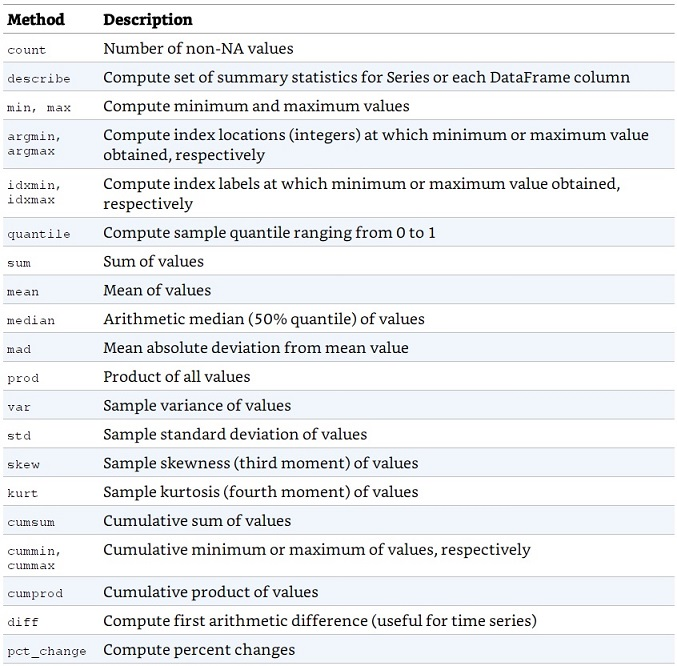

In [16]:
# Correlation and Covariance
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})
returns = price.pct_change() # compute percent change of the prices
print(returns.tail(), '\n')

# corr() = correlation of overlapping, aligned-by-index values of 2 Series
print(returns['MSFT'].corr(returns['IBM'])) 
# cov() - covariance of overlapping, aligned-by-index values of 2 Series
print(returns['MSFT'].cov(returns['IBM']))
print(returns.MSFT.corr(returns.IBM), '\n') # use attributes to select cols
print(returns.corr(), '\n') # p4int correlation matrix
print(returns.cov(),'\n')   # print covariance matrix

# Compute pairwise correlation using 'corrwith()'
print(returns.corrwith(returns.IBM), '\n') # Compute across 2 Series or DFs
print(returns.corrwith(volume), '\n') # Compute percent change w/ 'volume'

# Compute percent change with 'volume' row by row
results = returns.corrwith(volume, axis = 'columns')
print(results.tail()) # print first 5 results

                AAPL       IBM      MSFT      GOOG
Date                                              
2019-11-29 -0.002203  0.005083 -0.006171 -0.006116
2019-12-02 -0.011562 -0.011454 -0.012089 -0.011525
2019-12-03 -0.017830 -0.005944 -0.001605  0.004155
2019-12-04  0.008826 -0.000984  0.003617  0.019502
2019-12-05  0.014671 -0.000606  0.000534  0.005748 

0.488677021676201
9.423246693259311e-05
0.488677021676201 

          AAPL       IBM      MSFT      GOOG
AAPL  1.000000  0.406138  0.575500  0.524651
IBM   0.406138  1.000000  0.488677  0.414773
MSFT  0.575500  0.488677  1.000000  0.660542
GOOG  0.524651  0.414773  0.660542  1.000000 

          AAPL       IBM      MSFT      GOOG
AAPL  0.000247  0.000083  0.000133  0.000125
IBM   0.000083  0.000171  0.000094  0.000082
MSFT  0.000133  0.000094  0.000218  0.000148
GOOG  0.000125  0.000082  0.000148  0.000231 

AAPL    0.406138
IBM     1.000000
MSFT    0.488677
GOOG    0.414773
dtype: float64 

AAPL   -0.117743
IBM    -0.133528
MSFT   -

In [17]:
# Unique values, Counts and Membership
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
uniques = obj.unique() # similar to 'set' returns unique values in Series
print(uniques)
uniques.sort()         # sort uniques
print(uniques, '\n')

print(obj.value_counts(), '\n') # create a series of value frequencies 
# use 'sort = False' to turn off default sorting
print(pd.value_counts(obj.values, sort = False), '\n')  

# use 'isin()' to create a boolean Series for vectorized set membership
print(obj, '\n')
mask = obj.isin(['b', 'c'])  
print(mask, '\n')
print(obj[mask],'\n')

# Index.get_indexer():
# Place indices for each value of an array into an array of distinct values
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
print(to_match, '\n')
unique_vals = pd.Series(['c', 'b', 'a'])
print(unique_vals, '\n')
print(pd.Index(unique_vals).get_indexer(to_match), '\n')

# Compute a histogram of multiple related columns in a DataFrame
data = pd.DataFrame({' Qu1': [1, 3, 4, 3, 4], 'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
print(data, '\n')
result = data.apply(pd.value_counts).fillna(0)
# Row lables = unique values that appear in the matrix
# Row Values = number of times the unique values appear in each column
print(result) 

['c' 'a' 'd' 'b']
['a' 'b' 'c' 'd'] 

c    3
a    3
b    2
d    1
dtype: int64 

b    2
a    3
c    3
d    1
dtype: int64 

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object 

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool 

0    c
5    b
6    b
7    c
8    c
dtype: object 

0    c
1    a
2    b
3    b
4    c
5    a
dtype: object 

0    c
1    b
2    a
dtype: object 

[0 2 1 1 0 2] 

    Qu1  Qu2  Qu3
0     1    2    1
1     3    3    5
2     4    1    2
3     3    2    4
4     4    3    4 

    Qu1  Qu2  Qu3
1   1.0  1.0  1.0
2   0.0  2.0  1.0
3   2.0  2.0  0.0
4   2.0  0.0  2.0
5   0.0  0.0  1.0


<center>Unique values, Counts and Membership methods</center>

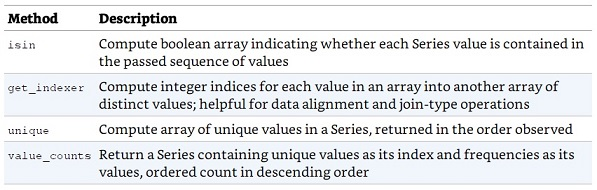